In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

## Univariate Regression
#### Predicting price of houses according to Area

In [25]:
df=pd.read_csv("H:\Machine Learning\CSV folder\homeprices.csv",sep=' ',names=['area','price'])
df.fillna(0)
print(len(df.index))

5


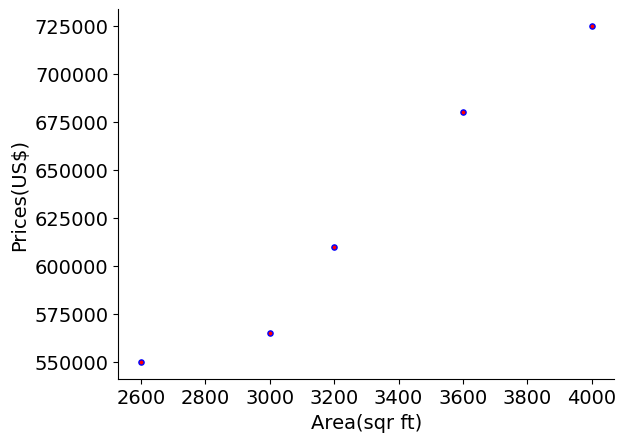

In [110]:
%matplotlib inline
fig,ax=plt.subplots()
ax.scatter(df.area,df.price,color='r',marker='o',s=14,edgecolor='blue')
ax.set_xlabel('Area(sqr ft)',fontsize=14)
ax.set_ylabel('Prices(US$)',fontsize=14)
ax.tick_params(which='both',labelsize=14)
ax.spines[['right','top']].set_color('none')

In [111]:
reg=linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [112]:
reg.predict([[3300]])

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [113]:
reg.intercept_

180616.43835616432

In [114]:
reg.coef_

array([135.78767123])

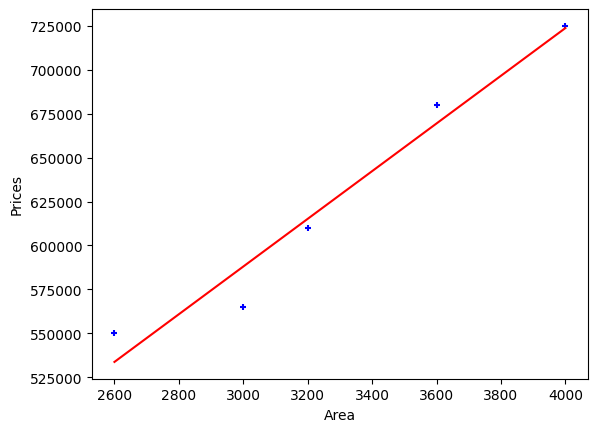

In [115]:
fig,ax=plt.subplots()
ax.set_xlabel('Area')
ax.set_ylabel('Prices')
ax.scatter(df.area,df.price,color='blue',marker='+',s=14)
ax.plot(df.area,reg.predict(df[['area']]),color='red')

In [116]:
df_2=pd.read_csv('area.csv')
df_2.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [117]:

p=reg.predict(df_2)

In [118]:
df_2['prices']=p
df_2.to_csv("prediction.csv",index=False)
df_3=pd.read_csv("prediction.csv")
# df_3.drop('Unnamed: 0',axis=1,inplace=True)
df_3.head()

,area,prices
0,1000,316404.109589
1,1500,384297.945205
2,2300,492928.082192
3,3540,661304.794521
4,4120,740061.643836


#### Predicting per capital income of every year for Canada


In [119]:
df_4=pd.read_csv("H:\Machine Learning\canada_per_capita_income.csv")
df_4.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [120]:
reg=linear_model.LinearRegression()
reg.fit(df_4[['year']],df_4['per capita income (US$)'])

LinearRegression()

Text(0, 0.5, 'Per Capita Income (US$)')

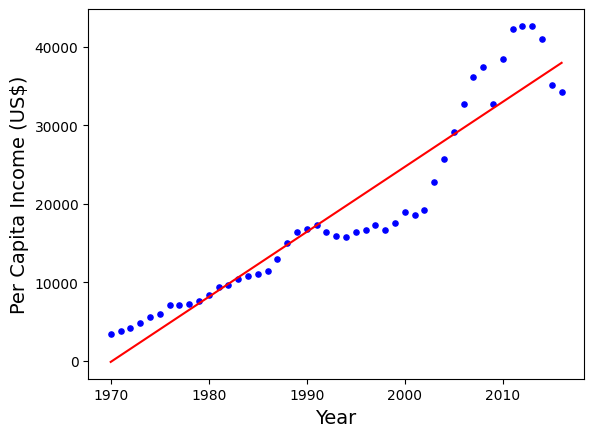

In [121]:
fig,ax=plt.subplots()
ax.scatter(df_4.year,df_4['per capita income (US$)'],color='blue',marker='o',s=14)
ax.plot(df_4.year,reg.predict(df_4[['year']]),color='r')
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Per Capita Income (US$)',fontsize=14)

## MultiVariate Regression

In [122]:
df_5=pd.read_csv("homeprices_2.csv",sep=' ')
df_5.columns

Index(['area', 'bedrooms', 'age', 'price'], dtype='object')

In [125]:
df_5.bedrooms=df_5.bedrooms.fillna(df_5.bedrooms.median())
df_5

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.5,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [128]:
reg=linear_model.LinearRegression()
reg.fit(df_5[['area','bedrooms','age']],df_5.price)

LinearRegression()

In [130]:
reg.coef_

array([    198.47159002, -116583.73881651,  -14267.77585936])

In [131]:
reg.intercept_

656046.5390048665

In [135]:
df_6=pd.read_csv("H:\Machine Learning\houseprice_table.csv",sep=' ')
df_6

,area,bedrooms,age
0,3000,3,40
1,2500,4,5


In [137]:
reg.predict(df_6)

array([330999.05823262, 614551.67948517])

### Gradient Descent Algorithm


In [57]:
df_7=pd.read_csv("./CSV folder/titanic.csv")
df_7.Age.fillna(df_7.Age.mean(),inplace=True)
df_7.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Epoch:0
Epoch:50
Epoch:100
Epoch:150
Epoch:200
Epoch:250
Epoch:300
Epoch:350
Epoch:400
Epoch:450
2.2880263701926696e+30 6.440024687382061e+28


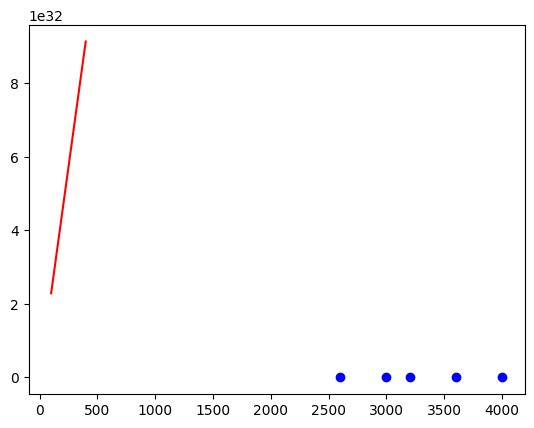

In [56]:
def loss_function(m,b,df):
    total_error=0
    for i in range(len(df.index)):
        x=df.iloc[i].area
        y=df.iloc[i].price
        total_error+=((m*x+b)-y)**2
    total_error=total_error/float(len(df.index))  
    return total_error  
def gradient_descent_linear_regression(m_now,b_now,df,L):
    m_gradient=0
    b_gradient=0
    n=len(df.index)
    for i in range(n):
        x=df.iloc[i].Age
        y=df.iloc[i].Survived
        m_gradient+=((2/n) * x * ((m_now*x+b_now)-y))
        b_gradient+=(2/n) * ((m_now*x+b_now)-y)
    m=m_now-m_gradient*L
    b=b_now-b_gradient*L
    return m,b
m=0
b=10
L=0.001
epochs=500
for i in range(epochs):
    if i% 50==0:
        print(f"Epoch:{i}")
    m,b=gradient_descent_linear_regression(m,b,df_7,L)
print(m,b)
plt.scatter(df.area,df.price,color="blue")   
plt.plot(list(range(100,400)),[m*x+b for x in range(100,400)],color='r') 
plt.show()
        

### sklearn implementation of mean absolute error and mean squared error

In [1]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,max_error,r2_score
y_true=[3,-0.5,2,7]
y_predict=[2.5,0,2,8]
# mean absolute square is unable to punish big errror terms if it is more ,the model is not good
print("mean Absolute error is:" ,mean_absolute_error(y_true,y_predict))
# mean squared error is great at finding big error it is bad if we take single big error then it will increase which is not good
print("mean squared error is:", mean_squared_error(y_true,y_predict))
print("root mean squared error is:" ,mean_squared_error(y_true,y_predict,squared=False))
# max error shows the maximum error 
print("max error is:" ,max_error(y_true,y_predict))
# r2 score is quite popular it is 1-sse/sst square of difference between actual-predicted and actual-mean
print("r2 score is :",r2_score(y_true,y_predict))
# adjusted r2 score solves the problem

mean Absolute error is: 0.5
mean squared error is: 0.375
root mean squared error is: 0.6123724356957945
max error is: 1.0
r2 score is : 0.9486081370449679
